
### **DMDW Lab Assignment - 08**

---



**Aim :** To perform text mining on the given data warehouse and perform correlation analysis between for the given data sets


**Name :** Kiran Patil

**ID :** 211070904



In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/VJTI/4th_year/SEM_07/NLP_LAB/211070904_EXP_04/IMDB_Dataset.csv')

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:

# Text Mining - Sentiment Analysis
df['Sentiment'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Synthetic 'Sales' variable
df['Sales'] = pd.Series(range(1, 1001))



In [ ]:
# Correlation Analysis
correlation_matrix = df[['Sentiment', 'Sales']].corr()

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)


In [ ]:

# Train a simple linear regression model
X_train = train_data[['Sentiment']]
y_train = train_data['Sales']



In [ ]:
missing_values_y_train = y_train.isnull().sum()
if missing_values_y_train > 0:
    print(f"Number of missing values in y_train: {missing_values_y_train}")
    # Handle missing values, for example, by filling them with the mean
    y_train.fillna(y_train.mean(), inplace=True)


model = LinearRegression()
model.fit(X_train, y_train)



Number of missing values in y_train: 39198


LinearRegression()

In [ ]:
# Make predictions on the test set
X_test = test_data[['Sentiment']]
y_pred = model.predict(X_test)



In [ ]:
# Drop rows with missing values in y_pred and test_data['Sales']
eval_data = pd.concat([test_data['Sales'], pd.Series(y_pred, index=test_data.index)], axis=1, keys=['Actual', 'Predicted']).dropna()


In [ ]:
mse = mean_squared_error(eval_data['Actual'], eval_data['Predicted'])
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 81248.1212911037


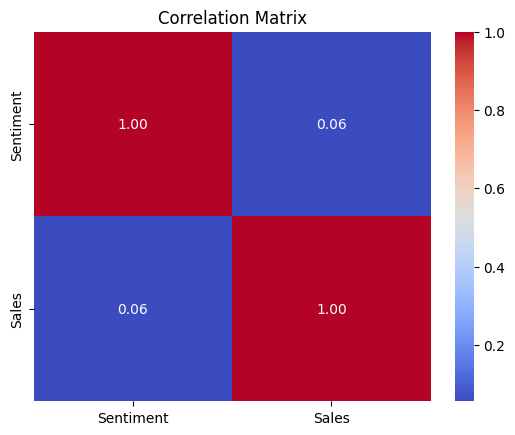

In [ ]:
# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()